In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [3]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [43]:
PATH = "data/plant_seedlings_classification"

In [44]:
print(torch.cuda.is_available())

print(torch.backends.cudnn.enabled)

os.listdir(PATH)

True
True


['test', 'sample_submission.csv', 'train']

In [45]:
dirs = os.listdir(f'{PATH}/train')
dirs

['Cleavers',
 'Maize',
 'Fat Hen',
 'Common Chickweed',
 'Black-grass',
 'Charlock',
 'Loose Silky-bent',
 'Small-flowered Cranesbill',
 'Common wheat',
 'Sugar beet',
 'Shepherds Purse',
 'Scentless Mayweed']

In [46]:
files = os.listdir(f'{PATH}/train/Sugar beet')[:5]

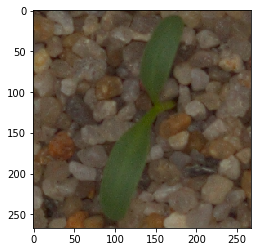

In [47]:
img = plt.imread(f'{PATH}/train/Sugar beet/{files[0]}')

plt.imshow(img)

In [48]:
img.shape

(267, 267, 3)

In [49]:
class_to_count = { classification : len(os.listdir(f'{PATH}/train/{classification}')) for classification in dirs }
class_to_count

{'Cleavers': 287,
 'Maize': 221,
 'Fat Hen': 475,
 'Common Chickweed': 611,
 'Black-grass': 263,
 'Charlock': 390,
 'Loose Silky-bent': 654,
 'Small-flowered Cranesbill': 496,
 'Common wheat': 221,
 'Sugar beet': 385,
 'Shepherds Purse': 231,
 'Scentless Mayweed': 516}

In [82]:
def create_valid_from_train_dir(path, train_dir='train', val_dir='valid'):
    sets_top_level = os.listdir(path)
    if sets_top_level.count(val_dir):
        print(f'Validation directory - {val_dir} - already exists. exiting function')
        return
    
    train_path = f'{path}/{train_dir}'
    valid_path = f'{path}/{val_dir}'
    os.mkdir(valid_path)
    
    classes = os.listdir(f'{path}/{train_dir}')
    class_to_fns = { cls : os.listdir(f'{train_path}/{cls}') for cls in classes }
    class_to_count = { cls : len(fns) for (cls, fns) in class_to_fns.items() }
    class_to_cv_idxs = { cls : get_cv_idxs(cnt).tolist() for (cls, cnt) in class_to_count.items() }
    
    for (cls, cv_idxs) in class_to_cv_idxs.items():
        train_class_path = f'{train_path}/{cls}'
        valid_class_path = f'{valid_path}/{cls}'
        
        os.mkdir(valid_class_path)
        
        fns = class_to_fns[cls]
        fns_to_move = [fns[i] for i in cv_idxs]
        
        for fn in fns_to_move:
            shutil.move(f'{train_class_path}/{fn}', f'{valid_class_path}/{fn}')
        print(f'moved {len(fns_to_move)} out of {len(fns)} files for class: {cls}')

create_valid_from_train_dir(PATH)

moved 57 out of 287 files for class: Cleavers
moved 44 out of 221 files for class: Maize
moved 95 out of 475 files for class: Fat Hen
moved 122 out of 611 files for class: Common Chickweed
moved 52 out of 263 files for class: Black-grass
moved 78 out of 390 files for class: Charlock
moved 130 out of 654 files for class: Loose Silky-bent
moved 99 out of 496 files for class: Small-flowered Cranesbill
moved 44 out of 221 files for class: Common wheat
moved 77 out of 385 files for class: Sugar beet
moved 46 out of 231 files for class: Shepherds Purse
moved 103 out of 516 files for class: Scentless Mayweed


In [83]:
arch=resnet34
sz = 224

data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))

In [84]:
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 3)

100%|██████████| 15/15 [00:03<00:00,  7.08it/s]


epoch      trn_loss   val_loss   accuracy                 
    0      1.586074   0.913485   0.69905   
    1      1.08891    0.720683   0.752904                 
    2      0.865564   0.641237   0.783527                  



[array([0.64124]), 0.783526927327153]